# Final Project : Problem Statement

Your client is a retail banking institution. Term deposits are a major source of income for a bank.

A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can
be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

We start by importing the libraries that we will be using.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns # For data visualization 
import seaborn as sn  # For plotting graphs

%matplotlib inline
import warnings       # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
# importing both train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# train data overview
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
# test data interview
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
#filtering data based on certain condition, say where defaulted and secondary education.
trains = train[(train['default']=='yes') & (train['marital']=='single') & (train['job']=='unemployed')]
trains

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
9634,18002,44,unemployed,single,primary,yes,-4,no,yes,cellular,30,jul,788,2,-1,0,unknown,yes
16320,2280,28,unemployed,single,secondary,yes,-353,yes,no,unknown,12,may,89,3,-1,0,unknown,no
21277,25551,35,unemployed,single,secondary,yes,-126,no,no,cellular,19,nov,168,1,-1,0,unknown,no
21492,30841,35,unemployed,single,primary,yes,-84,no,no,cellular,9,feb,19,11,-1,0,unknown,no
26444,6580,30,unemployed,single,secondary,yes,-770,yes,no,unknown,28,may,87,1,-1,0,unknown,no


In [6]:
#information of filtered data
trains.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 9634 to 26444
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          5 non-null      int64 
 1   age         5 non-null      int64 
 2   job         5 non-null      object
 3   marital     5 non-null      object
 4   education   5 non-null      object
 5   default     5 non-null      object
 6   balance     5 non-null      int64 
 7   housing     5 non-null      object
 8   loan        5 non-null      object
 9   contact     5 non-null      object
 10  day         5 non-null      int64 
 11  month       5 non-null      object
 12  duration    5 non-null      int64 
 13  campaign    5 non-null      int64 
 14  pdays       5 non-null      int64 
 15  previous    5 non-null      int64 
 16  poutcome    5 non-null      object
 17  subscribed  5 non-null      object
dtypes: int64(8), object(10)
memory usage: 760.0+ bytes


In [7]:
#filtered data value counts for campaign
trains['campaign'].value_counts()

1     2
2     1
3     1
11    1
Name: campaign, dtype: int64

### Checking columns and their data types for train and test datasets

In [8]:
#checking columns for train and test datasets
train.columns, test.columns

(Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
        'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome', 'subscribed'],
       dtype='object'),
 Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
        'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome'],
       dtype='object'))

**subscribed** is our target variable as it is not present in the test dataset

In [9]:
#checking shape for train and test datasets
train.shape, test.shape

((31647, 18), (13564, 17))

In train dataset,

**independent variables** = 17
**target variable** = 1

Same goes for test dataset without the target variable since it will be predicted by us using the model we are going to build using out train dataset.

### Checking datatypes for train dataset

In [10]:
train.info() #same can be checked using train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


1. **Categorical variables** in dataset: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. **Continuous variables** in dataset: ID, age, balance, day, duration, campaign, pdays, previous

## Univariate Analysis

Analyzing our target variable, i.e. **subscribed**

As it is a categorical in nature, we'll look at it's
1. Frequency table
2. Percentage distribution
3. Bar plot

In [11]:
train['subscribed']

0         no
1         no
2         no
3        yes
4         no
        ... 
31642     no
31643    yes
31644     no
31645     no
31646    yes
Name: subscribed, Length: 31647, dtype: object

In [12]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [13]:
total = train['subscribed'].value_counts()[0] + train['subscribed'].value_counts()[1]
total

31647

In [14]:
# normalize = True to get proportions instead of number, and then converting to percentage.
train['subscribed'].value_counts(normalize=True) * 100

no     88.261131
yes    11.738869
Name: subscribed, dtype: float64

**3715** out of **31647** have subscribed ~ **12%**.

Let us now explore the variables univariate analysis, after which we will look at the relation between various independent variables and the target variable. Finally, we'll look at the correlation plot to see which variables affects the target variable most.

<AxesSubplot:>

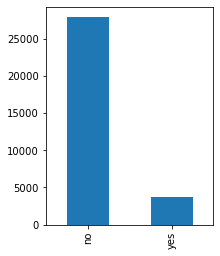

In [15]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot(kind="bar", stacked=False, figsize=(3,4))

At first, we'll look  at the distribution of age variable to see how many people belongs to a particular age group.

<AxesSubplot:xlabel='age', ylabel='Count'>

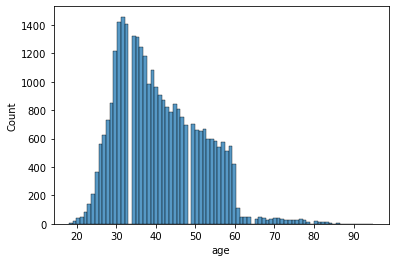

In [16]:
sn.histplot(train["age"])

It can be inferred that most of the clients fall in the age group between 20-60.

Let us look at what are the different types of jobs of the clients using a frequency table.

<AxesSubplot:>

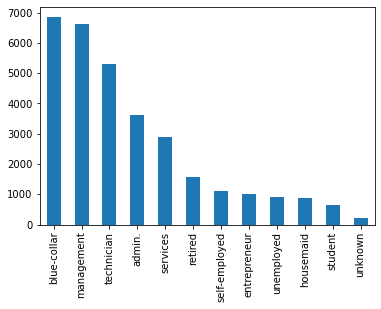

In [17]:
train['job'].value_counts().plot.bar()

Most of the clients belongs to blue-collar job & Students are least in number.

Let us also look at how many clients have default history.

<AxesSubplot:>

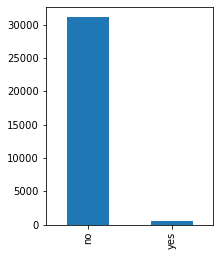

In [18]:
train['default'].value_counts().plot(kind="bar", stacked=False, figsize=(3,4))

~90% of the clients have no default history.

Let us now explore some of these variables against the target variable using bivariate analysis.
1. **Scatter plots** (Continuous variables)
2. **Crosstabs** (Categorical variables)

## Bivariate Analysis

Subscribed (yes/no) wrt different job roles

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

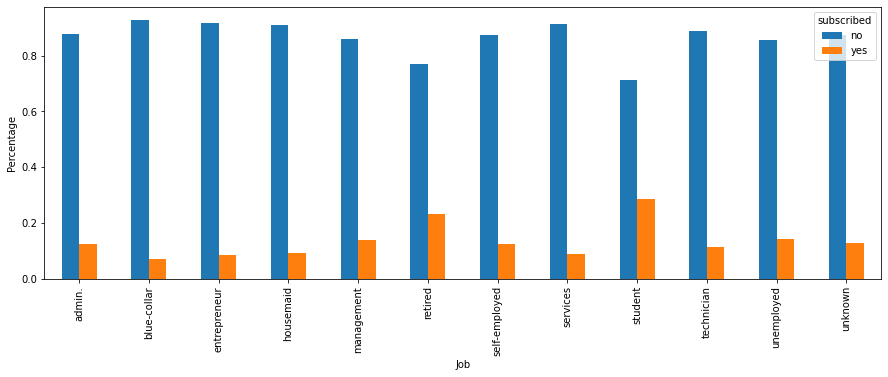

In [19]:
#creating a crosstab which will be presented in bar graph form to observe trends followed
print(pd.crosstab(train['job'],train['subscribed']))
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(15,5))
plt.xlabel('Job')
plt.ylabel('Percentage')

From the graph above, it can be deduced that students and retirees are more likely to subscribe to a term deposit. (which is unexpected given that most students do not sign up for a term deposit generally).

The likely cause is that there are fewer students in the dataset, and more students have subscribed to a term deposit compared to other job types.

Now, let us explore the default variable against the subscribed variable.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

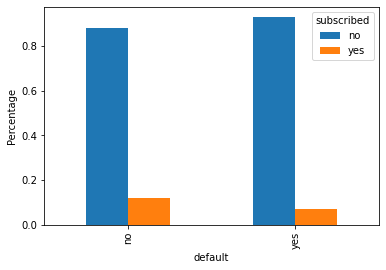

In [20]:
#creating a crosstab which will be presented in bar form to observe trends followed
print(pd.crosstab(train['default'],train['subscribed']))
default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(6,4))
plt.xlabel('default')
plt.ylabel('Percentage')

We can deduce that clients who have never defaulted before have a slightly better likelihood of getting a term loan than clients who have previously defaulted.

Now, let us group our job type against mean balance value.

<AxesSubplot:xlabel='job'>

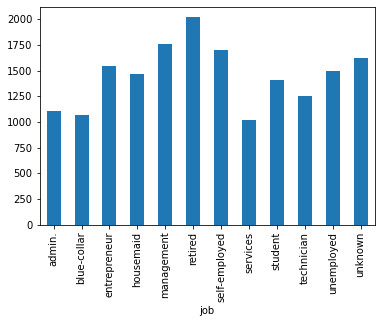

In [21]:
train.groupby(['job'])['balance'].mean().plot.bar()

It can be deduced that retired persons have the highest balance followed by management and self-employed

Now, let us group marital status against mean age value.

<AxesSubplot:xlabel='marital'>

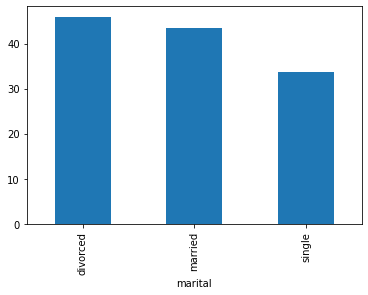

In [22]:
train.groupby(['marital'])['age'].mean().plot.bar()

It can be deduced that divorced persons have higher avg. age followed by married

## Multivariate Analysis

In [23]:
train.groupby(['default','marital'])['age'].mean()

default  marital 
no       divorced    46.000566
         married     43.429705
         single      33.702684
yes      divorced    43.872340
         married     41.790123
         single      33.329341
Name: age, dtype: float64

marital   divorced    married     single
default                                 
no       46.000566  43.429705  33.702684
yes      43.872340  41.790123  33.329341


<AxesSubplot:xlabel='default'>

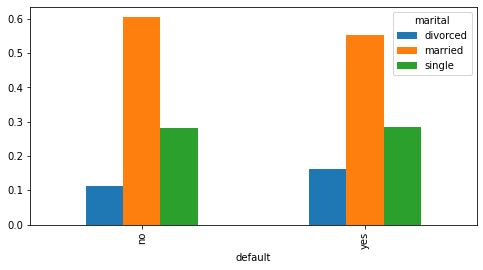

In [24]:
print(pd.crosstab(train['default'],train['marital'], values=train['age'], aggfunc='mean'))
job1=pd.crosstab(train['default'],train['marital'])
job1.div(job1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))

What have we done here?
We prepared a bar graph based on three variables, described as follows:
1. Whether the person has defaulted or not.
2. Whether the marital status is single, marrried or divorced.
3. After grouping the data based on the two factors, we plotted the mean age of the persons.

Conclusion: In both the cases (whether defaulted or not), married couple are more in number followed by single.

## Correlation

Let's have a look at how closely our numerical variables are related. We'll look at the correlation between each of these variables, as well as the variables with strong negative or positive values. This allows us to gain a sense of the variables that may have an impact on our target variable.

In [25]:
# We will convert our target variable into numeric values first, as correlation requires our variable to be numerical.
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

<AxesSubplot:>

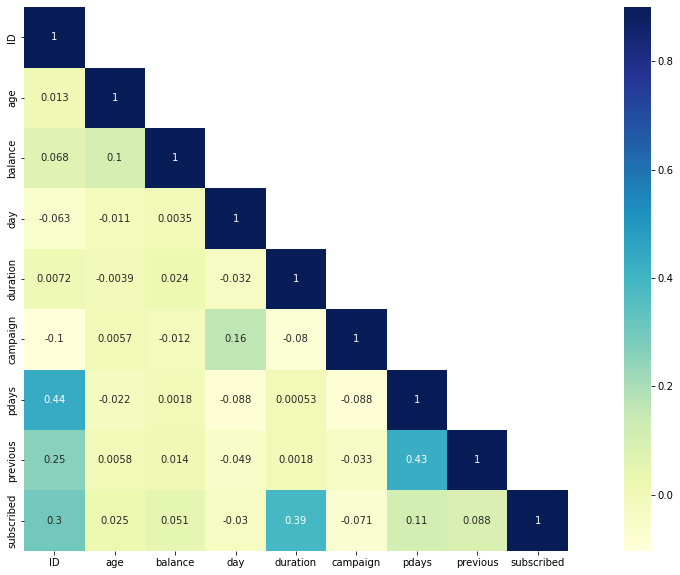

In [26]:
#getting a correlation dataframe
corr = train.corr()
#converting it to numpy-array
mask = np.array(corr)
#removing the lower triangle of the np-array, tril_indices_from() returns the indices for the lower-triangle of arr.
mask[np.tril_indices_from(mask)] = False
#Create a figure and a set of subplots.
fig,ax= plt.subplots()
#setting figure size
fig.set_size_inches(20,10)
#forming the heatmap
sn.heatmap(corr, mask=mask, vmax=.9, square=True, annot=True, cmap="YlGnBu")

We can deduce that the duration of the call has a positive relationship with the target variable. This can also be verified. Because as the duration of the call is longer, there is a greater likelihood that the client will express interest in the term deposit and, as a result, will subscribe to the term deposit.

### Looking for missing values

In [27]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset. 

Next, we'll begin developing our predictive model for predicting whether or not a client will sign up for a term deposit.

## Model Building

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

In [28]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [29]:
# applying dummies on train dataset
train = pd.get_dummies(train)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   31647 non-null  int64
 1   age                  31647 non-null  int64
 2   balance              31647 non-null  int64
 3   day                  31647 non-null  int64
 4   duration             31647 non-null  int64
 5   campaign             31647 non-null  int64
 6   pdays                31647 non-null  int64
 7   previous             31647 non-null  int64
 8   job_admin.           31647 non-null  uint8
 9   job_blue-collar      31647 non-null  uint8
 10  job_entrepreneur     31647 non-null  uint8
 11  job_housemaid        31647 non-null  uint8
 12  job_management       31647 non-null  uint8
 13  job_retired          31647 non-null  uint8
 14  job_self-employed    31647 non-null  uint8
 15  job_services         31647 non-null  uint8
 16  job_student          3

In [31]:
train.shape

(31647, 52)

We'll split the train data into a training and test set so that we can test our model's performance on the validation set.

We'll use **20%** of the data as a validation set and the remainder as a training set.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# splitting into train and validation with 20% of the data as a validation set and the remainder as a training set..
x_train, x_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

Our data is now ready. It's time to put our model together and see how it performs, so let's start by creating a **Logistic Regression model** since our target variable is categorical at original.

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
# defining the logistic regression model
lreg = LogisticRegression()

In [36]:
# fitting the model on  X_train and y_train
lreg.fit(x_train,y_train)

LogisticRegression()

In [37]:
# making prediction on the validation set
prediction = lreg.predict(x_val)

Now we will evaluate how accurate our predictions are.

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.8870458135860979

On the validation dataset, we received an accuracy score of roughly **89%**.

Let's try decision tree algorithm now to check if we get better accuracy with that. 

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
# defining the decision tree model with depth of 4.
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [42]:
# fitting the decision tree model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [43]:
# making prediction on the validation set
predict = clf.predict(x_val)

In [44]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.9042654028436019

We got an accuracy of more than **90%** on the validation set.

Let's now make the prediction on test dataset. We will make the similar changes in the test set as we have done in the training set before making the predictions.

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [46]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [47]:
test = pd.get_dummies(test)

In [48]:
test_prediction = clf.predict(test)

We will save these predictions into a csv file, and then then open this csv file and copy the predictions on the provided excel file to generate score.

In [49]:
solution = pd.DataFrame()

In [50]:
# creating a Business_Sourced column and saving the predictions in it
solution['ID'] = test['ID']
solution['subscribed'] = test_prediction

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [51]:
solution['subscribed'].replace(0,'no',inplace=True)
solution['subscribed'].replace(1,'yes',inplace=True)

In [52]:
solution.to_csv('solution.csv', header=True, index=False)

##### End